In [2]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:terveyspuntari')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [3]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [4]:
print(meta['description'])

Jokaiselle Suomen kunnalle lasketun indeksin avulla pyritään havainnollistamaan sitä, miten tervettä tai sairasta alueen väestö on suhteessa koko maan väestön keskiarvoon (= 100). Indeksi ilmoitetaan sekä sellaisenaan että ikä- ja sukupuolivakioituna. Vakioinnilla ikä- ja sukupuolirakenteen vaikutus indeksilukuun voidaan poistaa, mikä mahdollista alueittaisen vertailun alueiden välisistä ikä- ja sukupuolirakenteen eroista huolimatta. Sairastavuusindeksi perustuu kolmeen tilastomuuttujaan: kuolleisuuteen, työkyvyttömyyseläkkeellä olevien osuuteen työikäisistä (16–64-vuotiaat) sekä lääkkeiden ja ravintovalmisteiden korvausoikeuksien haltijoiden osuuteen väestöstä. Niistä kukin on suhteutettu maan väestön keskiarvoon. Sairastavuusindeksi on näiden kolmen osaindeksin keskiarvo. Yhden osaindeksin laskentatapaa muutettiin vuonna 2012: erityiskorvausoikeusindeksi laajennettiin kattamaan myös rajoitetusti peruskorvattavien lääkkeiden korvausoikeudet sekä kliinisten ravintovalmisteiden korvauso

**Datan muuttujatieto**

In [5]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type
0,default,kuntanumero,integer
1,default,kunta,string
2,default,indeksi,string
3,default,vuosi,integer
4,default,vakioitu,string
5,default,indeksin_arvo,number


**Datan ensimmäiset rivit**

In [6]:
print(dat.head())

   kuntanumero     kunta              indeksi   vuosi  vakioitu  indeksin_arvo
0          5.0  Alajärvi  -kuolleisuusindeksi  2017.0  Vakioitu           93.8
1          5.0  Alajärvi  -kuolleisuusindeksi  2016.0  Vakioitu           91.9
2          5.0  Alajärvi  -kuolleisuusindeksi  2015.0  Vakioitu           92.9
3          5.0  Alajärvi  -kuolleisuusindeksi  2014.0  Vakioitu           89.5
4          5.0  Alajärvi  -kuolleisuusindeksi  2013.0  Vakioitu          102.7


In [7]:
plotdat = (dat
 .query('vuosi == 2017')
 .query('indeksi == "-kuolleisuusindeksi"')
 .sort_values(by='indeksin_arvo', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

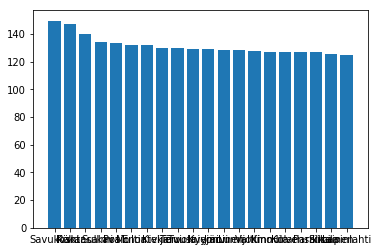

In [8]:
plt.bar(plotdat['kunta'], plotdat['indeksin_arvo'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [7]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id     etuus  \
0  '2018':1 '3674':7 '414':4 '432023':5 '4617':8 ...    1  Yhteensä   
1  '1617':8 '2018':1 '3024':7 '305':4 '327333':5 ...    2  Yhteensä   
2  '118497':5 '2018':1 '3919':7 '4614':8 '81':6 '...    3  Yhteensä   
3  '2018':1 '3532':7 '446':4 '50':6 '525543':5 '7...    4  Yhteensä   
4  '2018':1 '246':4 '254566':5 '3318':7 '8347':8 ...    5  Yhteensä   

  euroa_per_saaja      kunta maksetut_etuudet_euroa saajat vuosi  
0       3674,4617       Akaa              432023,71    414  2018  
1       3024,1617   Alajärvi              327333,55    305  2018  
2       3919,4614  Alavieska              118497,81     87  2018  
3       3532,7264     Alavus              525543,50    446  2018  
4       3318,8347   Asikkala              254566,97    246  2018  
